# 1. Defininición del problema

#### Contexto

Nos encontramos en una situación económica muy recurrente en una empresa, y es ¿Hasta qué punto vale la pena hacer una **inversión** en alguna campaña publictaria en diferentes canales para **incrementar** el volumen de **ventas**? Tenemos unos registros históricos de los **resultados** obtenidos y queremos hacer una **predicción** lo más acercada posible, de acuerdo a las ventas nos basaremos en diferentes modelos en los que comparamos los resultados de dichas predicciones y al final elegiremos el **modelo** que tenga mejor **performance**

# 2. Instalación de librerías y configuración inicial 👨🏻‍💻

In [ ]:
# Importamos librerías y dependencias

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
# Evitamos los molestos warnings
warnings.simplefilter("ignore")

# 3. Cargamos los datos 💿💻

In [ ]:
# Cargamos nuestro dataset

data = pd.read_csv('https://raw.githubusercontent.com/jorge-robledo11/Datasets/main/Datasets/ads/Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
# Transformamos los datos a lo que mejor convenga y analizaremos los features del dataset

data.convert_dtypes().dtypes

TV           Float64
Radio        Float64
Newspaper    Float64
Sales        Float64
dtype: object

In [ ]:
# Dimensiones del dataset

data.shape

(200, 4)

In [ ]:
# Observamos si hay datos faltantes

data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
# Resumen de nuestro dataset

data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Simple Linear Regression

## Statsmodel

In [ ]:
# Definimos nuestra Regresión lineal

linear_model = smf.ols(formula='Sales~TV', data=data).fit()
display(linear_model)

In [ ]:
# Parámetros

display(linear_model.params)

Intercept    7.032594
TV           0.047537
dtype: float64

El **Modelo Predictivo** sería $Sales = 7.032594 + (0.047537)TV$

**Razonamiento**: Por cada $0.047537$ unidades monetarias **invertidas** en **publicidad televisiva** reportará $7.032594$ unidades monetarias en **ventas**

In [ ]:
# P-Values

display(linear_model.pvalues)

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

Nuestros $p-values$ son realmente bajos lo cual es muy bueno, de ese modo no tendremos que rechazar nuestra **hipótesis nula**

In [ ]:
# Estimadores estadísticos

# R2
r2_mod1 = (round(linear_model.rsquared,4))
display(f'R2: {r2_mod1}')

# R2 Ajustado
r2_adj_mod1 = round(linear_model.rsquared_adj,4)
display(f'R2 ajustado: {r2_adj_mod1}')

'R2: 0.6119'

'R2 ajustado: 0.6099'

In [ ]:
# Summary

linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 10 Nov 2021   Prob (F-statistic):           1.47e-42
Time:                        23:35:33   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Como queremos intentar **predecir las ventas** con respecto al **gasto en publicidad de TV**, lo definiremos de la siguiente manera:

In [ ]:
# Predicción de ventas

sales_pred = linear_model.predict(pd.DataFrame(data['TV']))
sales_pred.head()

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

# 4. Patrones en los datos 🔎👾

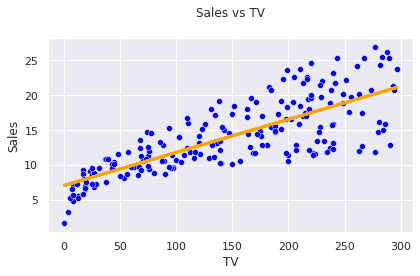

In [ ]:
# Scatterplot

%matplotlib inline
sns.set_theme(style='darkgrid')
sns.scatterplot(data=data, x='TV', y='Sales', color='blue', palette='deep')
plt.plot(pd.DataFrame(data['TV']), sales_pred, c='orange', linewidth=3)
plt.title('Sales vs TV\n')
plt.tight_layout();

### Análisis del Scatterplot 🔎📊

- **TV** y **Sales** no guardan mucha **correlación**
- Los datos están muy dispersos y alejados de nuestras **predicciones** en **Sales**

Añadimos una nueva columna con el valor de las **ventas predecidas** y el $RSE$

In [ ]:
# Columnas Ventas predecidas y RSE

data['Sales Pred'] = 7.032594 + 0.047537 * data['TV']
data['RSE'] = (data['Sales'] - data['Sales Pred'])**2

In [ ]:
# Calculamos nuestros estimadores ANOVA

SSD = sum(data['RSE'])
RSE = np.sqrt(SSD/(len(data)-2))

# Display
display(f'SSD: {SSD}')
display(f'RSE: {RSE}')

'SSD: 2102.5305838896525'

'RSE: 3.258656369238098'

In [ ]:
# Calculamos la media de las ventas y el error

sales_promedio = np.mean(data['Sales'])
error = RSE/sales_promedio

# Display
display(f'Ventas promedio: {sales_promedio}')
display(f'Error promedio: {error}')

'Ventas promedio: 14.0225'

'Error promedio: 0.23238768901680143'

El **error promedio** lo podemos interpretar como un $23,23$% del **modelo** que **no logra explicar correctamente**

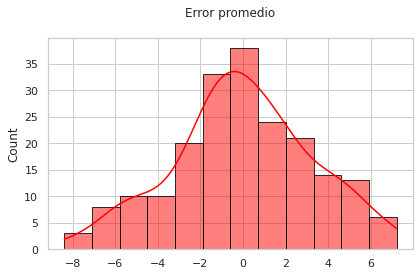

In [ ]:
# Histplot

%matplotlib inline
sns.set_theme(style='whitegrid')
sns.histplot(data['Sales'] - data['Sales Pred'], kde=True, bins=12, edgecolor='black', linewidth=0.8, color='red')
plt.title('Error promedio\n')
plt.tight_layout();

### Análisis del Histplot 🔎📊

- Podemos observar que existe una **distribución normal** en el **error promedio** entre **las ventas y las ventas predecidas**

#### Conclusión parcial 

Hasta el momento podemos decir que nuestro **modelo** es poco **confiable**, tiene una **tasa de error** alta del $23,23$%, lo cual no genera muchas expectativas, sin embargo, hasta el momento solo hemos utilizado **una variable explicativa** con respecto a otra, podríamos intentar testear con otros **features** para saber cómo responde el **modelo**

# Multiple Linear Regression

## Statsmodel

Buscamos entre todas las **combinaciones posibles de modelos**, uno que tenga el menor $p-value$ con un íntervalo de confianza de $0.05$

Agregamos como nuevo **feature** al **modelo** _Newspaper_ para ver cómo se comporta el modelo

In [ ]:
# Definimos nuestro segundo modelo

linear_model_2 = smf.ols(formula='Sales~TV+Newspaper', data=data).fit()

In [ ]:
# Parámetros

display(linear_model_2.params)

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [ ]:
# P-Values

display(linear_model_2.pvalues)

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

Nuestros $p-values$ son un poco más bajos lo cual es mucho mejor, hasta el momento podríamos rechazar nuestra **hipótesis nula**, pero falta mucho por observar y analizar para llegar a mejores conclusiones

El **Modelo Predictivo** ahora sería $Sales = 5.774948 + (0.046901)TV + (0.044219)Newspaper$

**Razonamiento**: Por cada $0.046901$ y $0.044219$ unidades monetarias **invertidas** en **publicidad televisiva** y en **periódico** respectivamente reportará $5.774948$ unidades monetarias en **ventas**

In [ ]:
# Estimadores estadísticos

# R2
r2_mod2 = (round(linear_model_2.rsquared,4))
display(f'R2: {r2_mod2}')

# R2 Ajustado
r2_adj_mod2 = round(linear_model_2.rsquared_adj,4)
display(f'R2 ajustado: {r2_adj_mod2}')

'R2: 0.6458'

'R2 ajustado: 0.6422'

La mejora con respecto al primer modelo fue insignificativa según los estimadores de $R^2$ y $R^2$ ajustado

In [ ]:
# Summary

linear_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Wed, 10 Nov 2021   Prob (F-statistic):           3.95e-45
Time:                        23:35:34   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ahora queremos intentar **predecir** las **ventas** con respecto al **gasto** en **publicidad de TV** y en **Newspaper**, lo definiremos de la siguiente manera:

In [ ]:
# Predicción de ventas del segundo modelo

sales_pred2 = linear_model_2.predict(pd.DataFrame(data[['TV', 'Newspaper']]))
sales_pred2.head()

0    19.626901
1     9.856348
2     9.646055
3    15.467318
4    16.837102
dtype: float64

Añadimos una nueva columna con el valor de las **ventas predecidas** y el $RSE$

In [ ]:
# Columnas Ventas predecidas y RSE del segundo modelo

data['Sales Pred_2'] = 5.774948 + 0.046901 * data['TV'] + 0.044219 * data['Newspaper']
data['RSE2'] = (data['Sales'] - data['Sales Pred_2'])**2

In [ ]:
# Calculamos nuestros estimadores ANOVA

SSD2 = sum((data['Sales'] - sales_pred2)**2)
RSE2 = np.sqrt(SSD2/(len(data)-2-1))

# Display
display(f'SSD del segundo modelo: {SSD2}')
display(f'RSE del segundo modelo: {RSE2}')

'SSD del segundo modelo: 1918.561811896827'

'RSE del segundo modelo: 3.120719860252885'

In [ ]:
# Calculamos la media de las ventas y el error

sales_promedio = np.mean(data['Sales'])
error2 = RSE2/sales_promedio

# Display
display(f'Ventas promedio: {sales_promedio}')
display(f'Error promedio del segundo modelo: {error2}')

'Ventas promedio: 14.0225'

'Error promedio del segundo modelo: 0.2225508903728212'

Ahora el **error promedio** es de $22,25$% en el **segundo modelo** que **no logra explicar correctamente**

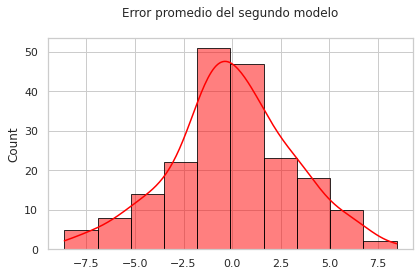

In [ ]:
# Posee una Distribución normal más ajustada

sns.set_theme(style='whitegrid')
sns.histplot(data['Sales'] - sales_pred2, kde=True, bins=10, edgecolor='black', linewidth=0.8, color='red')
plt.title('Error promedio del segundo modelo\n')
plt.tight_layout();

### Análisis del Histplot 🔎📊

- Podemos observar que existe una **distribución normal** pero más ajustada a una **Campana Gaussiana**

#### Conclusión parcial 

Hasta el momento podemos decir que nuestro **modelo** es insignificativamente mejor que el primero, sigue teniendo una **tasa de error** alta de $22,25$%, lo cual no genera mucha confianza por la variación, aunque hemos utilizado más **features** para el modelo, podríamos intentar con otra combinación de **features** para saber cómo responde el **modelo**

## Statsmodel

Buscamos entre todas las **combinaciones posibles de modelos**, uno que tenga el menor $p-value$ con un íntervalo de confianza de $0.05$

Agregamos otro nuevo **feature** al **primer modelo** _Radio_ para ver cómo se comporta el modelo, ya que _Newspaper_ no cumplió las expectativas

In [ ]:
data.head()

,TV,Radio,Newspaper,Sales,Sales Pred,RSE,Sales Pred_2,RSE2
0,230.1,37.8,69.2,22.1,17.970858,17.049816,19.626823,6.116605
1,44.5,39.3,45.1,10.4,9.147990,1.567528,9.856319,0.295589
2,17.2,45.9,69.3,9.3,7.850230,2.101832,9.646022,0.119731
3,151.5,41.3,58.5,18.5,14.234450,18.194921,15.467261,9.197506
4,180.8,10.8,58.4,12.9,15.627284,7.438076,16.837038,15.500271


In [ ]:
# Definimos nuestro tercer modelo

linear_model_3 = smf.ols(formula='Sales~TV+Radio', data=data).fit()

In [ ]:
# Parámetros

display(linear_model_3.params)

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

In [ ]:
# P-Values

display(linear_model_3.pvalues)

Intercept    4.565557e-19
TV           5.436980e-82
Radio        9.776972e-59
dtype: float64

Nuestros $p-values$ son todavía aún muchísimos más bajos lo cual es todavía mejor, probablemente tendremos que rechazar ambas **hipótesis** del inicio en este momento, pero sigamos analizando más a fondo

El **Modelo Predictivo** sería $Sales = 2.921100 + (0.04575)TV + (0.187994)Radio$

**Razonamiento**: Por cada $0.04575$ y $0.187994$ unidades monetarias **invertidas** en **publicidad televisiva** y **radial** respectivamente reportará $2.9211$ unidades monetarias en **ventas**

In [ ]:
# Estimadores estadísticos

# R2
r2_mod3 = (round(linear_model_3.rsquared,4))
display(f'R2: {r2_mod3}')

# R2 Ajustado
r2_adj_mod3 = round(linear_model_3.rsquared_adj,4)
display(f'R2 ajustado: {r2_adj_mod3}')

'R2: 0.8972'

'R2 ajustado: 0.8962'

In [ ]:
# Summary

linear_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 10 Nov 2021   Prob (F-statistic):           4.83e-98
Time:                        23:35:35   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ahora queremos intentar **predecir** las **ventas** con respecto al **gasto** en **publicidad de TV** y **radial**, lo definiremos de la siguiente manera:

In [ ]:
# Predicción de ventas del segundo modelo

sales_pred3 = linear_model_3.predict(pd.DataFrame(data[['TV', 'Radio']]))
sales_pred3.head()

0    20.555465
1    12.345362
2    12.337018
3    17.617116
4    13.223908
dtype: float64

Añadimos una nueva columna con el valor de las **ventas predecidas** y el $RSE$

In [ ]:
# Columnas Ventas predecidas y RSE del tercer modelo

data['Sales Pred_3'] = 2.921100 + 0.04575 * data['TV'] + 0.187994 * data['Radio']
data['RSE3'] = (data['Sales'] - data['Sales Pred_3'])**2

In [ ]:
# Calculamos nuestros estimadores ANOVA

SSD3 = sum((data['Sales'] - sales_pred3)**2)
RSE3 = np.sqrt(SSD3/(len(data)-2-1))

# Display
display(f'SSD del tercer modelo: {SSD3}')
display(f'RSE del tercer modelo: {RSE3}')

'SSD del tercer modelo: 556.9139800676185'

'RSE del tercer modelo: 1.6813609125080011'

In [ ]:
# Calculamos la media de las ventas y el error

sales_promedio = np.mean(data['Sales'])
error3 = RSE3/sales_promedio

# Display
display(f'Ventas promedio: {sales_promedio}')
display(f'Error promedio del tercer modelo: {error3}')

'Ventas promedio: 14.0225'

'Error promedio del tercer modelo: 0.11990450436855062'

Ahora el **error promedio** es de $11,99$% en el **tercer modelo** que **no logra explicar correctamente**, lo cual es muchísimo que los dos primeros considerablemente

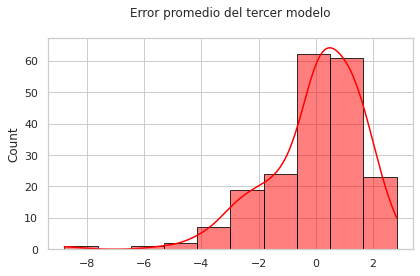

In [ ]:
# Histplot

sns.set_theme(style='whitegrid')
sns.histplot(data['Sales'] - sales_pred3, kde=True, bins=10, edgecolor='black', linewidth=0.8, color='red')
plt.title('Error promedio del tercer modelo\n')
plt.tight_layout();

### Análisis del Histplot 🔎📊

- Podemos observar que existe una **distribución sesgada hacia la derecha** en el **error promedio** entre **las ventas y las ventas predecidas del tercer modelo**

In [ ]:
data.head()

,TV,Radio,Newspaper,Sales,Sales Pred,RSE,Sales Pred_2,RSE2,Sales Pred_3,RSE3
0,230.1,37.8,69.2,22.1,17.970858,17.049816,19.626823,6.116605,20.554348,2.389039
1,44.5,39.3,45.1,10.4,9.147990,1.567528,9.856319,0.295589,12.345139,3.783567
2,17.2,45.9,69.3,9.3,7.850230,2.101832,9.646022,0.119731,12.336925,9.222911
3,151.5,41.3,58.5,18.5,14.234450,18.194921,15.467261,9.197506,17.616377,0.780789
4,180.8,10.8,58.4,12.9,15.627284,7.438076,16.837038,15.500271,13.223035,0.104352


## Multicolinealidad

Se refiere a una situación en la que dos o más **variables predictoras** se parecen mucho y, por tanto, resulta difícil medir sus efectos individuales sobre la **variable explicada**

**Factor Inflación de la Varianza**

- **VIF** = 1 ➡ Las variables no están correlacionadas
- **VIF** < 5 ➡ Las variables tienen una correlación moderada y se pueden quedar en el modelo
- **VIF** > 5 ➡ Las variables están altamente correlacionadas y deben desaparecer del modelo


In [ ]:
# Newspaper ~ TV + Radio

linear_model_n = smf.ols(formula='Newspaper~TV+Radio', data=data).fit()
R2_n = linear_model_n.rsquared
VIF_n = 1/(1-R2_n)
display(VIF_n)

1.1451873787239288

In [ ]:
# TV ~ Newspaper + Radio

linear_model_tv = smf.ols(formula='TV~Newspaper+Radio', data=data).fit()
R2_tv = linear_model_tv.rsquared
VIF_tv = 1/(1-R2_tv)
display(VIF_tv)

1.00461078493965

In [ ]:
# Radio ~ TV + Newspaper

linear_model_r = smf.ols(formula='Radio~TV+Newspaper', data=data).fit()
R2_r = linear_model_r.rsquared
VIF_r = 1/(1-R2_r)
display(VIF_r)

1.1449519171055353

# 5. Conclusiones 📋🖊

- El **periódico** y la **radio** tienen casi el mismo **VIF**, esto significa que ambas **variables** están absolutamente **correlacionadas** la una con la otra, pero no lo están con **TV**
- Debido a sus resultados en **VIF**, esto significa que el **modelo** con las 3 **variables** como **predictoras** o **explicativas** no mejoran los resultados
- Entre quedarnos con el **periódico** o con la **radio**, decidimos evidentemente quedarnos con la **radio**, porque nos da una mejor **precisión** en nuestro **modelo**

In [ ]:
# Modelo elegido

linear_model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.896   
Dependent Variable: Sales            AIC:                778.3941
Date:               2021-11-10 23:35 BIC:                788.2891
No. Observations:   200              Log-Likelihood:     -386.20 
Df Model:           2                F-statistic:        859.6   
Df Residuals:       197              Prob (F-statistic): 4.83e-98
R-squared:          0.897            Scale:              2.8270  
-------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    2.9211     0.2945    9.9192   0.0000   2.3403   3.5019
TV           0.0458     0.0014   32.9087   0.0000   0.0430   0.0485
Radio        0.1880     0.0080   23.3824   0.0000   0.1721   0.2038
-----------------------------------------------------------------
Omnibus:             60.022       Durbin-Watson:          2.081  
Prob(Omnibus):       0.000        Jarque-Bera (JB):       148.679
Skew:                -1.323       Prob(JB):               0.000  
Kurtosis:            6.292        Condition No.:          425    
=================================================================

"""

# 6. Trabajo finalizado

![link text](https://media.giphy.com/media/fDzM81OYrNjJC/source.gif?cid=ecf05e471mkgebs0ci5cquqshmfeg7fbpcbmws5rspjgh31e&rid=source.gif&ct=g)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4ec84517-f553-446b-9032-1da3132bd62a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>